In [274]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold


During the lecture, we learned about a new type of models - Decision Trees. They work by asking simple questions about the features in your dataset, and build a regressor/classifier by sequentially combining these questions.

In this lab, we are to get more familiar with decision trees, and learn to implement them aswell.

---

## Challanges

**Task 1**

Before we proceed with decision trees, have a readthrough of [this](https://www.kaggle.com/code/shirazumlintraminhaghjou/titanic-prediction-90-accuracy) Kaggle notebook. It contains some interesting feature engineering for the Titanic dataset we worked with last week. See if you can learn something cool.

*Note*: The title of the notebook is clickbaity.

In [275]:
titanic_df = pd.read_csv("../data/titanic.csv")

**Task 2**

Now go back to your last lab, where we trained a logistic regression model to predict survivability of passangers. Now also initialize and train a decision tree classifier for the same task, using the same features you used for logistic regression. You don't have to give the model any particular arguments when initializing, it's simply sufficient with the following:

In [276]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [277]:
titan_df = titanic_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"]).reset_index(drop=True).copy()
titan_df = pd.get_dummies(titan_df, columns=["Sex", "Embarked"], dtype=int, drop_first=True)
X, y = titan_df.drop(columns=["Survived"]), titan_df["Survived"]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print(f"Korsvalideringsresultat: {cv_scores}")
print(f"Genomsnittlig noggrannhet: {cv_scores.mean():.4f}")
clf = model.fit(X, y)



Korsvalideringsresultat: [0.79888268 0.81460674 0.76404494 0.76966292 0.82022472]
Genomsnittlig noggrannhet: 0.7935


Remember to cross-validate your results.

After your trained your tree, try this code. What do you see?

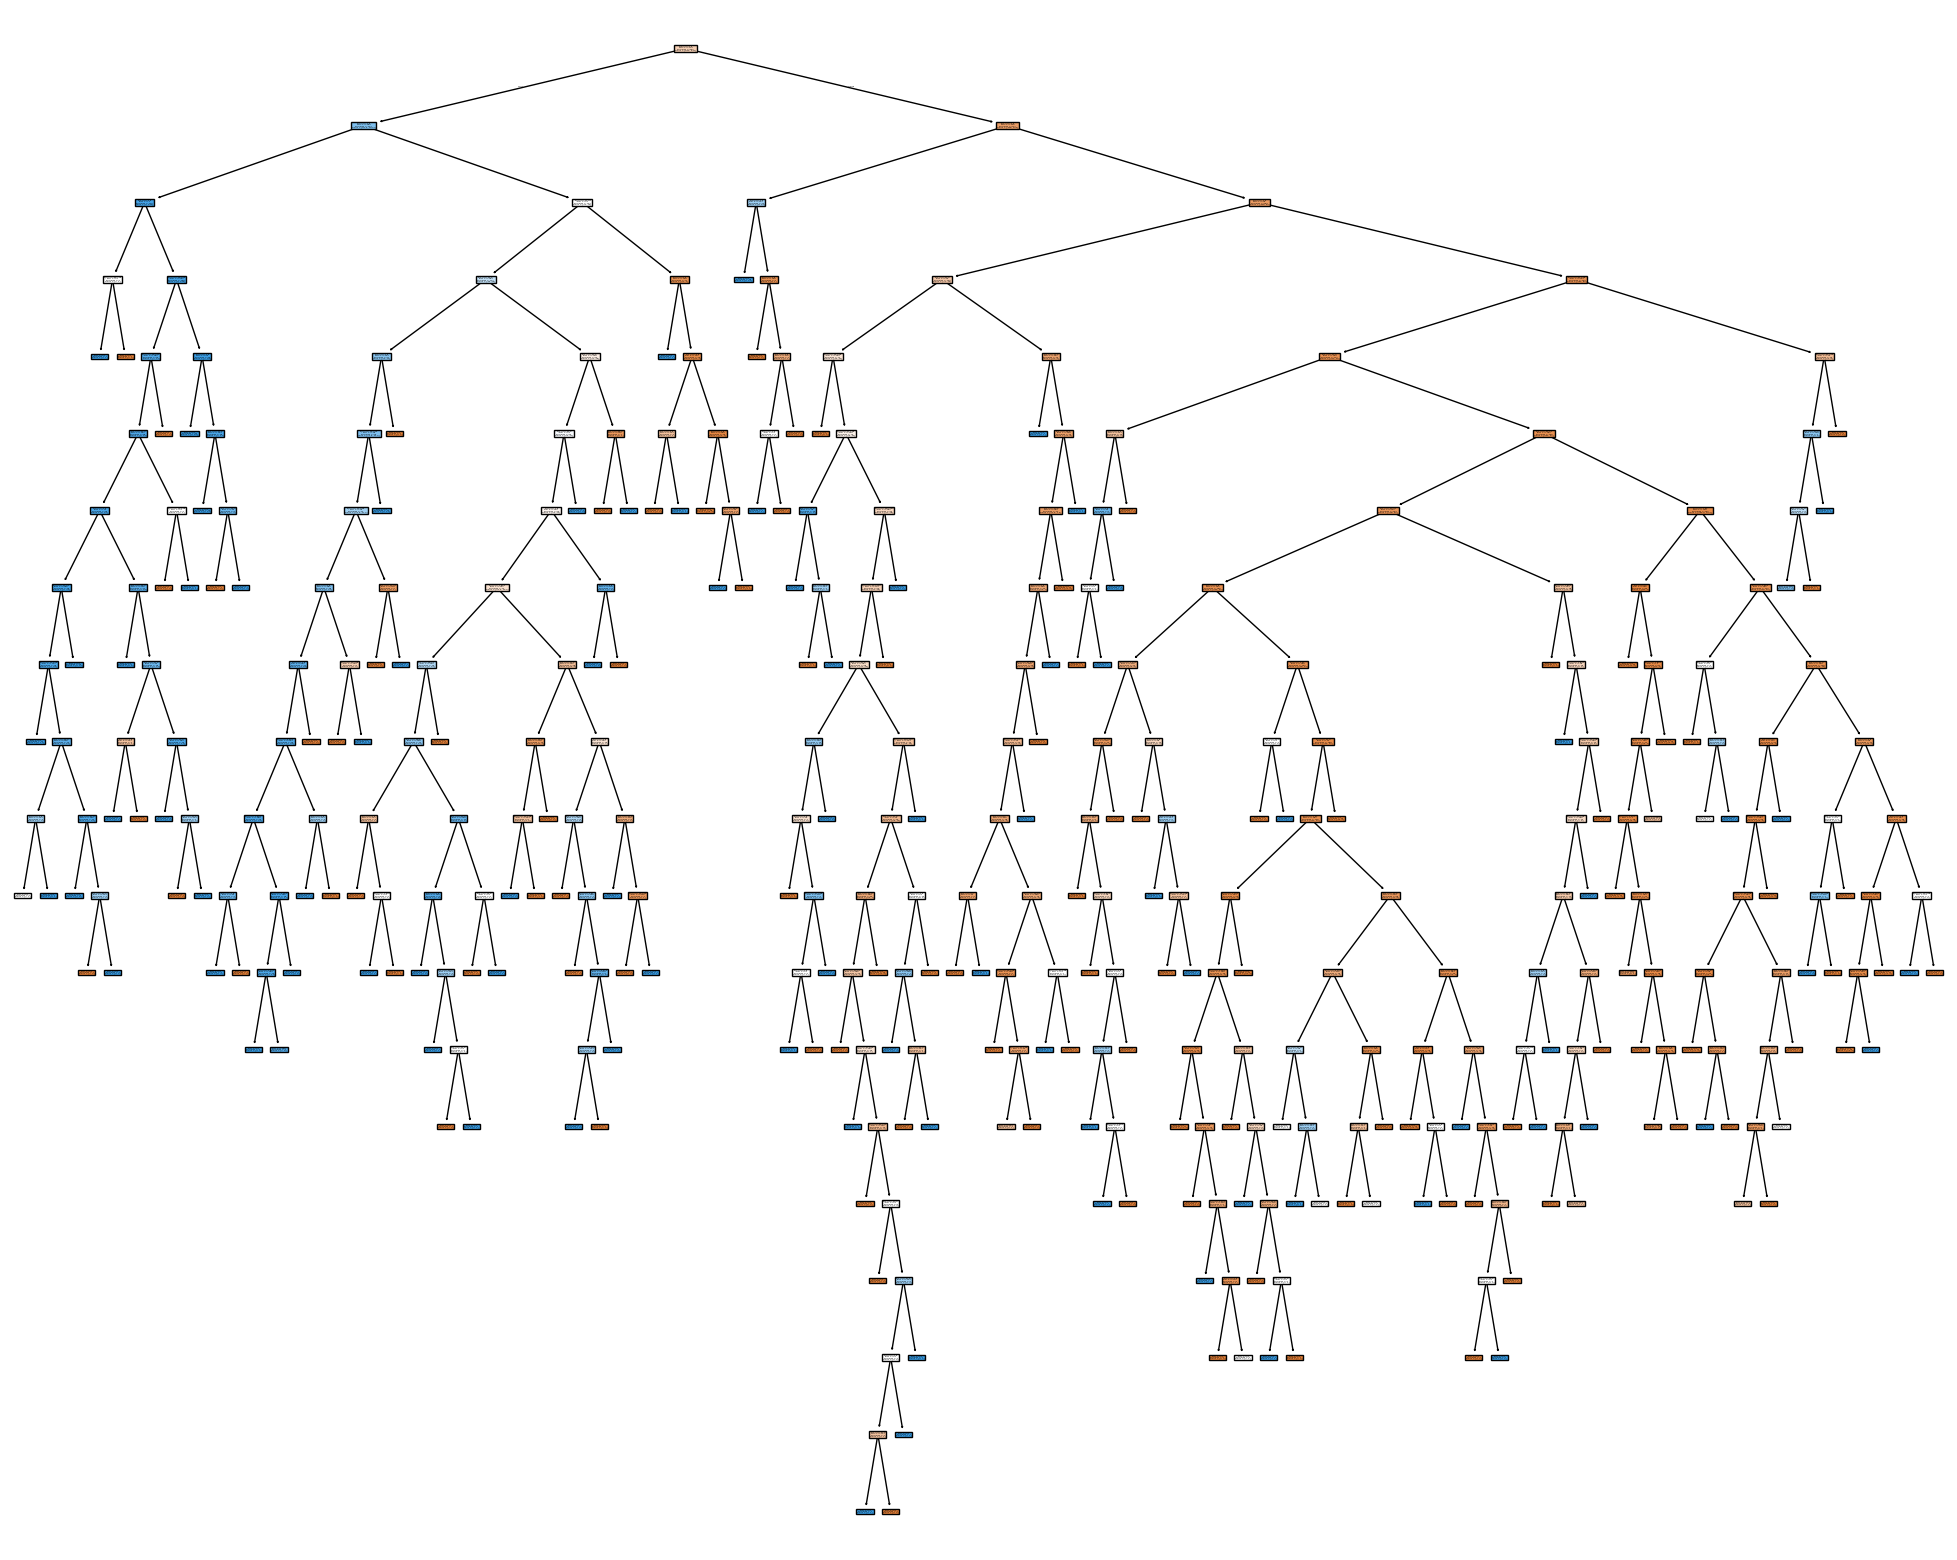

In [278]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   filled=True)

plt.show()

*Note*:

Decision Tree's are **not** sensitive to scale differences between features, you therefore do not need to conduct feature scaling as a preperation for training decision tree's.

Although it wouldn't hurt if you did - in fact, it would't affect the performance whatsoever.

**Task 3**

As we also discussed in the lecture, the number of Decision Nodes in a Tree highly influences it's performance. Too few, and you'll under - too many, and you'll overfit.

Now, do the same task as in Task 2, but this time try initializing your model with different allowed maximum depths. For example, for a max depth of 1:

Try different values of max_depth and see which one yields best performance. Remember to cross validate each time!

In [279]:
titan_df = titanic_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"]).reset_index(drop=True)
titan_df = pd.get_dummies(titan_df, columns=["Sex", "Embarked"], dtype=int, drop_first=True)
X, y = titan_df.drop(columns=["Survived"]), titan_df["Survived"]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
model = DecisionTreeClassifier(max_depth=3)
clf = model.fit(X, y)
print(f"Korsvalideringsresultat: {cv_scores}")
print(f"Genomsnittlig noggrannhet: {cv_scores.mean():.4f}")


Korsvalideringsresultat: [0.79888268 0.79213483 0.75842697 0.78089888 0.81460674]
Genomsnittlig noggrannhet: 0.7890


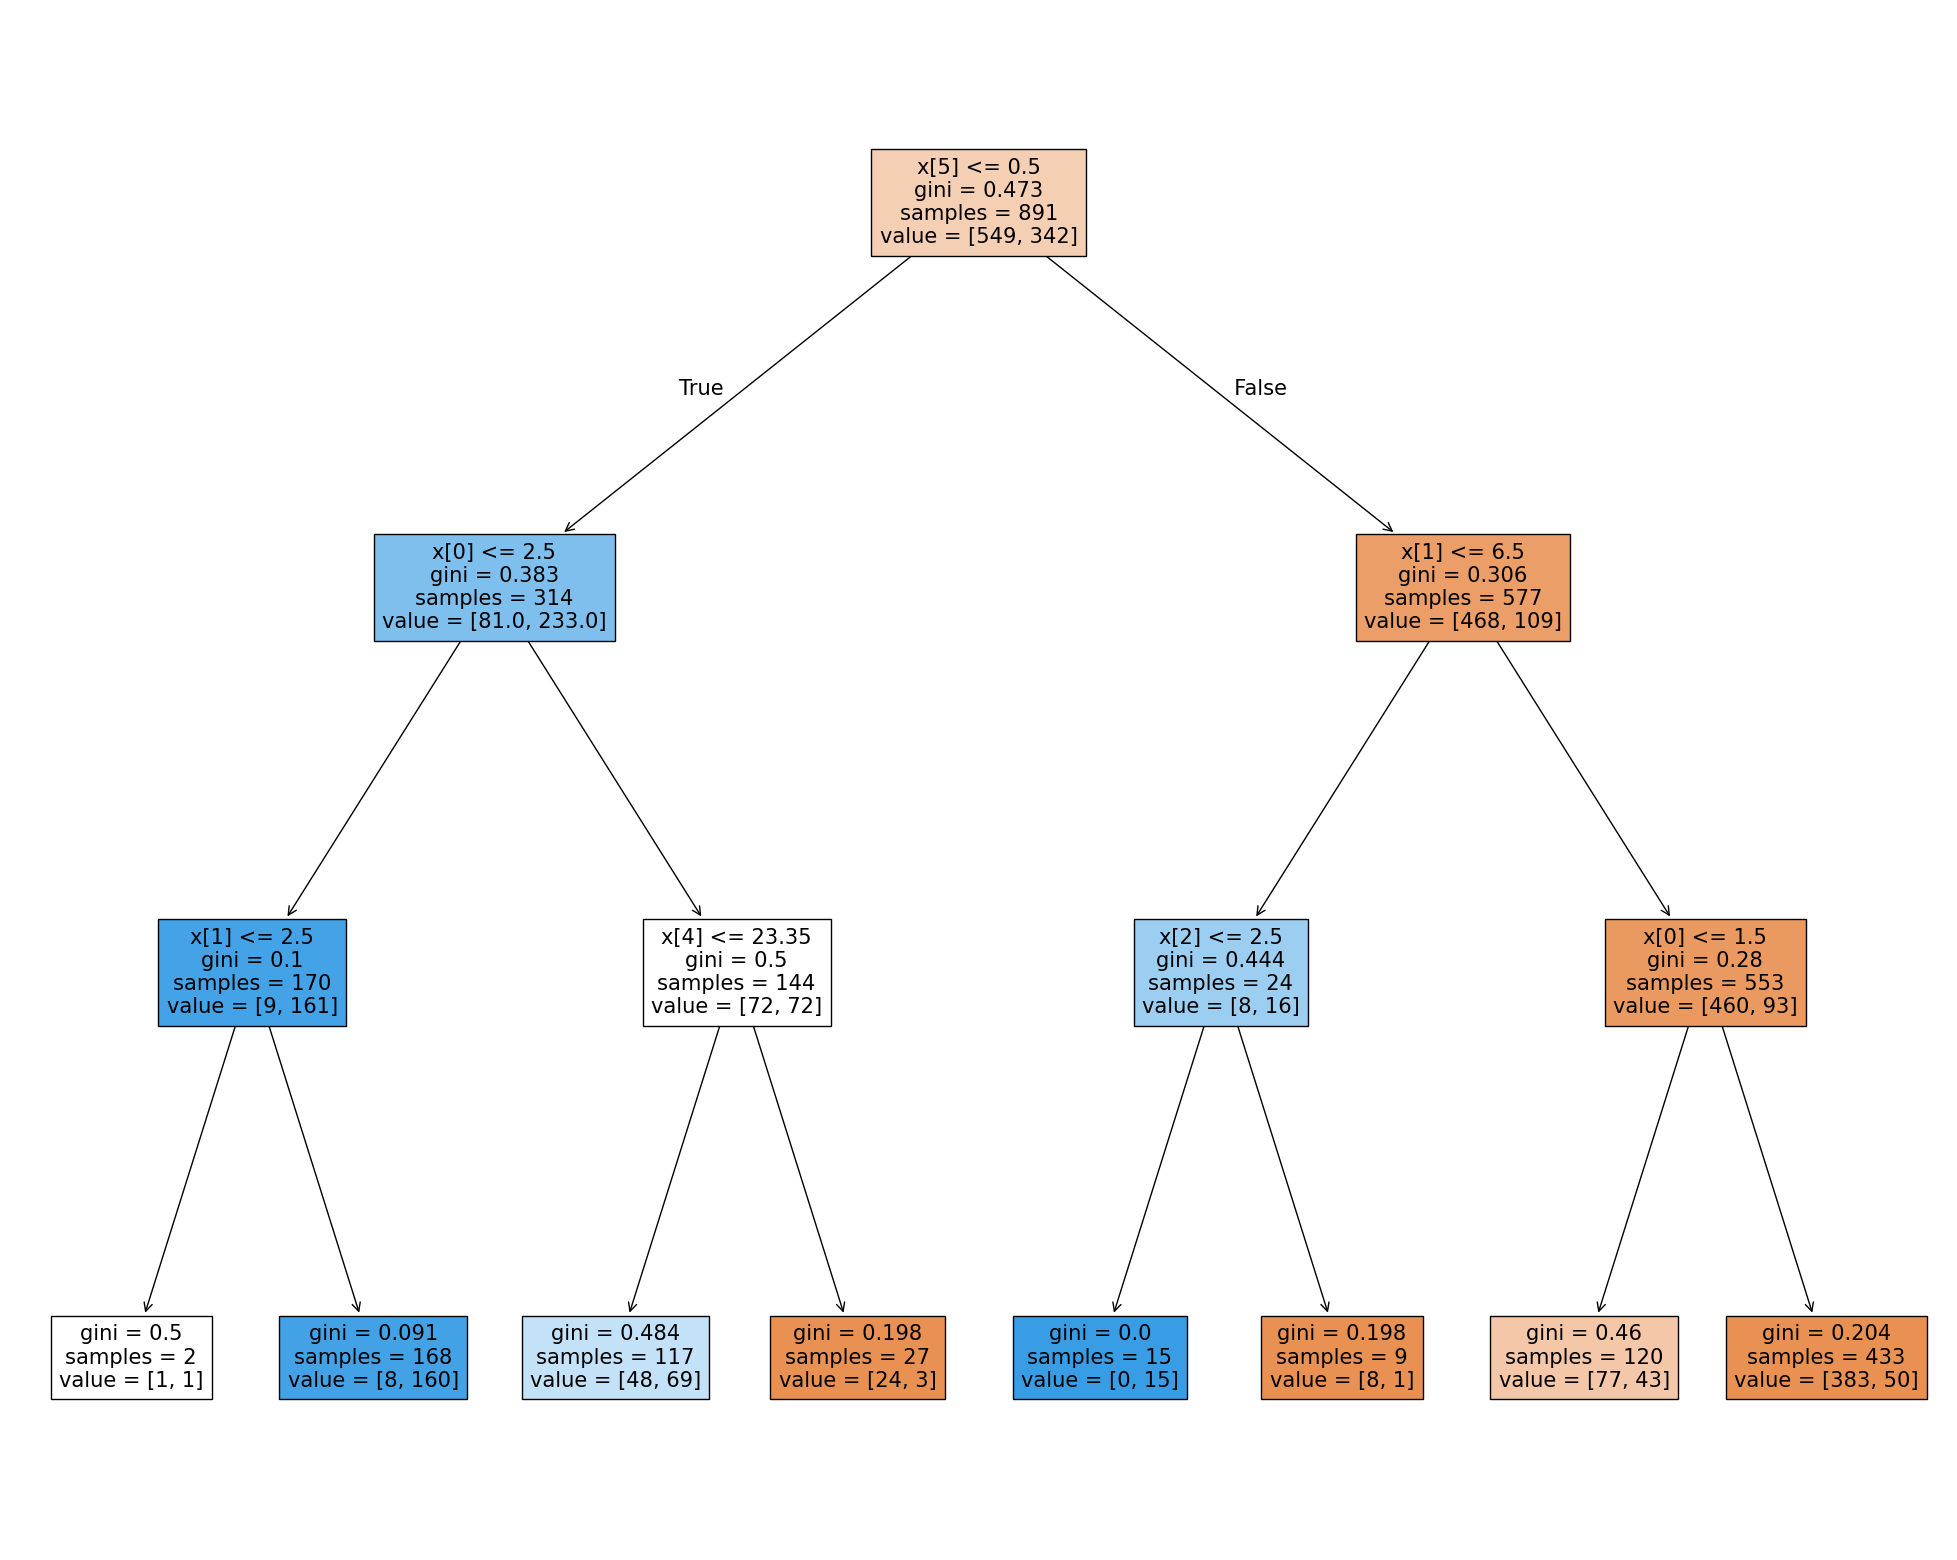

In [280]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   filled=True)

plt.show()

**Task 4**

Read more about the different parameters you can provide to adjust your tree's by reading the official documentation

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Decison Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

See if you find anything interesting you'd like to experiment with. There is much too learn about trees!

Korsvalideringsresultat: [0.83240223 0.8258427  0.80898876 0.80898876 0.84831461]
Genomsnittlig noggrannhet: 0.8249


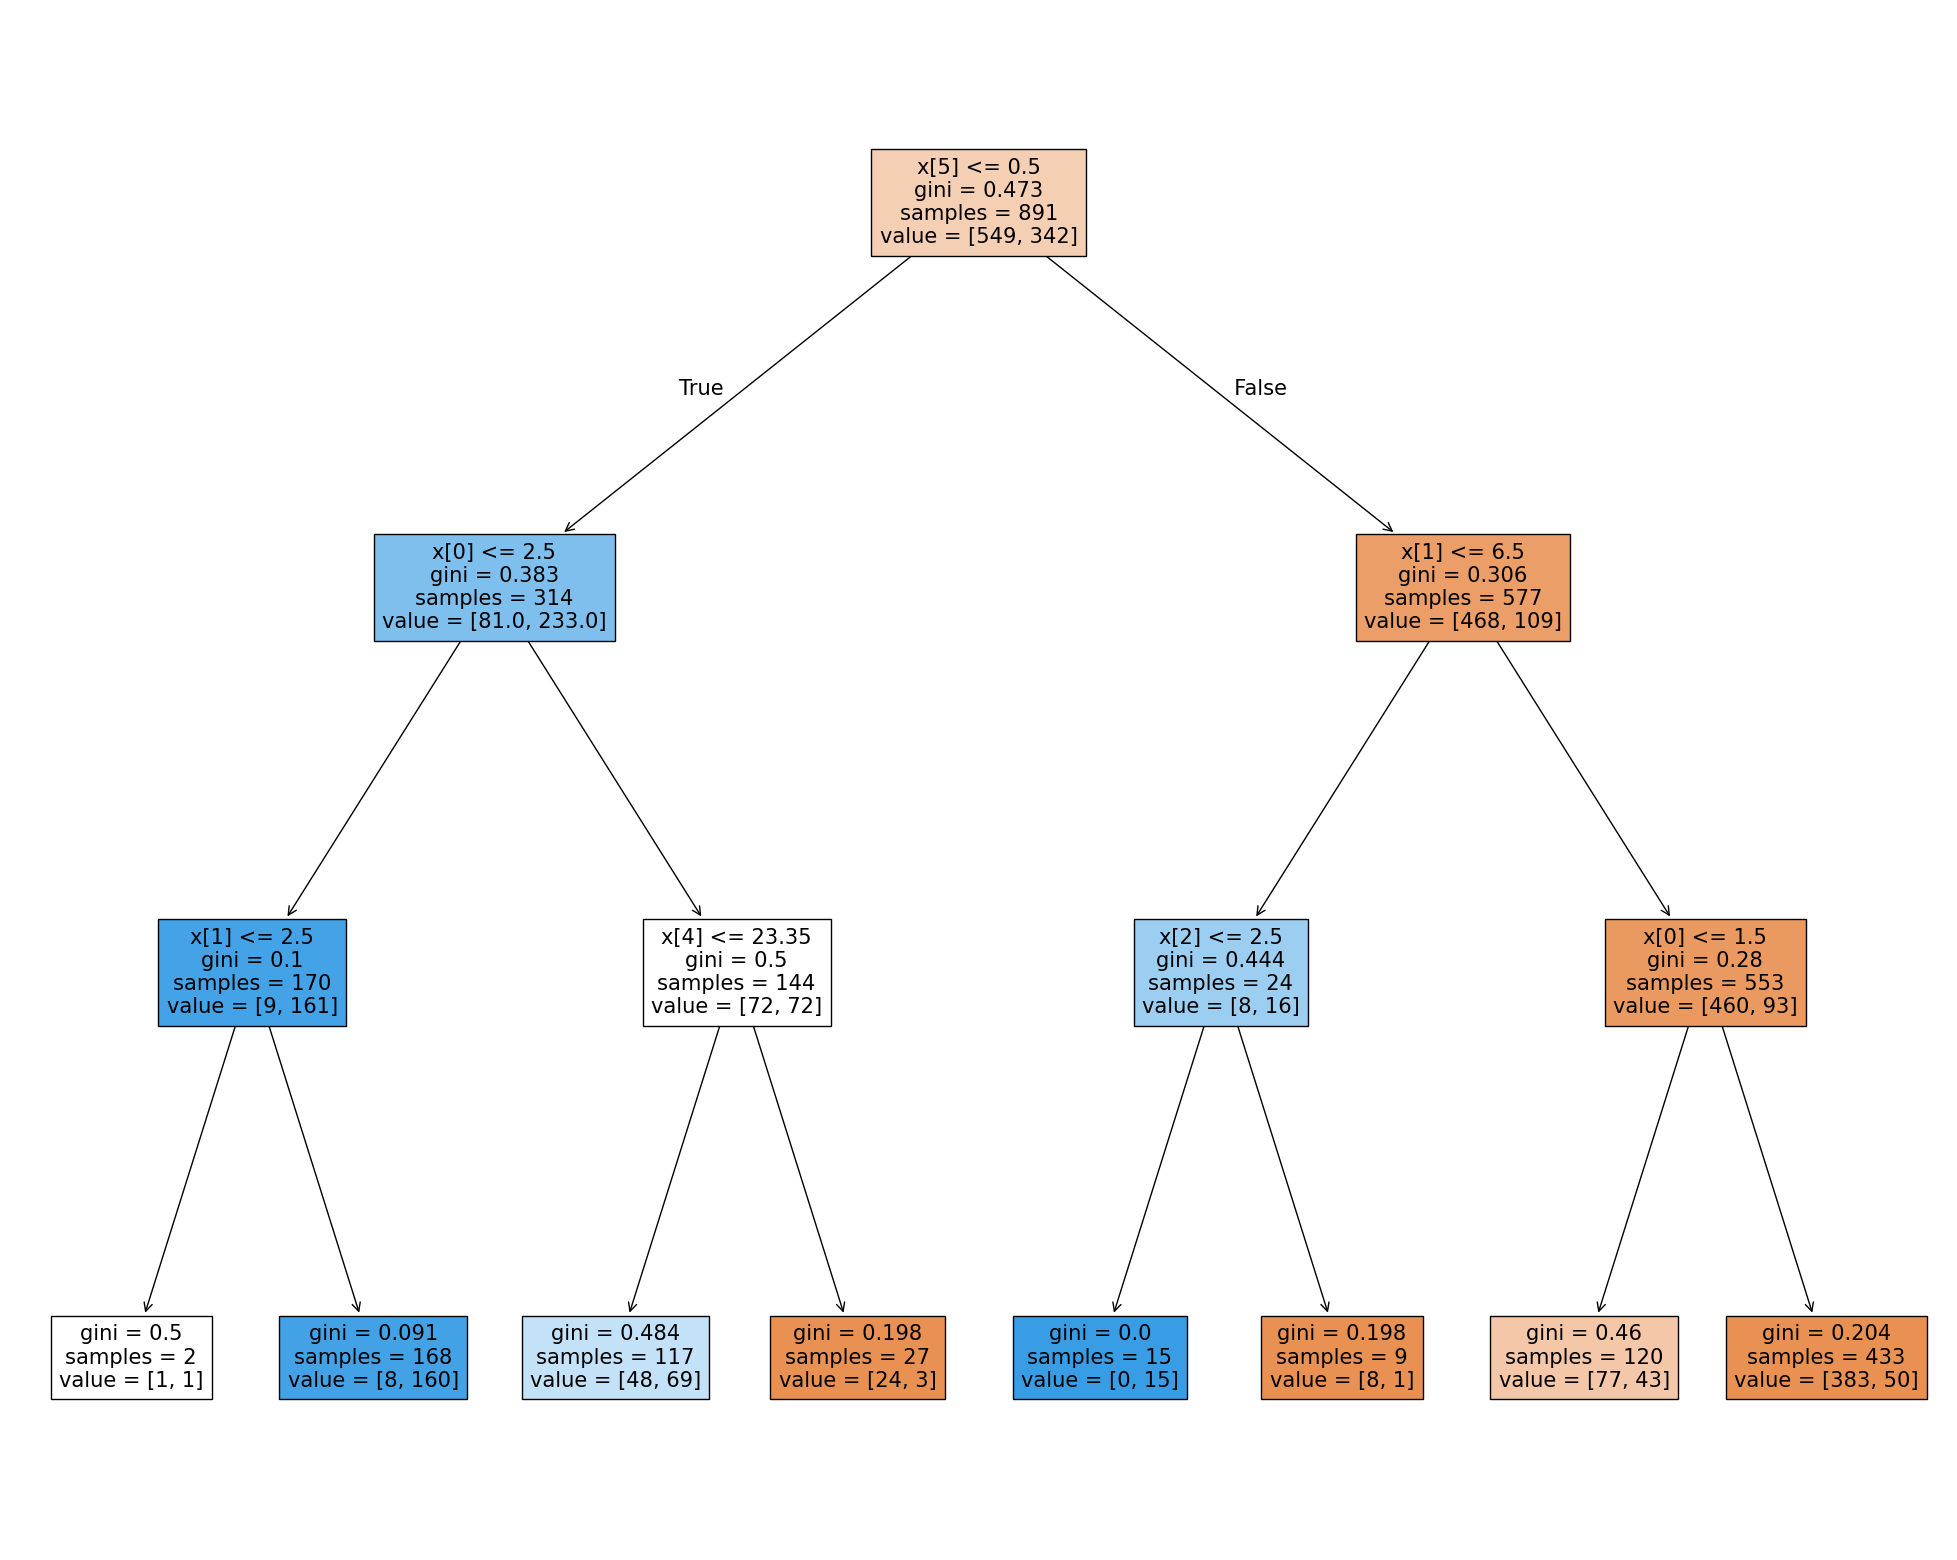

In [281]:
titan_df = titanic_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"]).reset_index(drop=True)
titan_df = pd.get_dummies(titan_df, columns=["Sex", "Embarked"], dtype=int, drop_first=True)
X, y = titan_df.drop(columns=["Survived"]), titan_df["Survived"]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
model = DecisionTreeClassifier(max_depth=3, min_samples_split= 10)
clf = model.fit(X, y)
print(f"Korsvalideringsresultat: {cv_scores}")
print(f"Genomsnittlig noggrannhet: {cv_scores.mean():.4f}")
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   filled=True)

plt.show()

In [282]:
from ydata_profiling import ProfileReport
profile = ProfileReport(titanic_df, title="Pandas Profile Report", explorative=True, html= {'style':{'full_width': True}})
profile.to_file("output.html") 
profile.to_notebook_iframe()

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 224.16it/s]


In [283]:
missing_data = titanic_df.isnull().sum().sort_values(ascending=False)
print(missing_data)
tit_df = titanic_df.drop(["PassengerId","Cabin", "Name", "Ticket"], axis=1)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


In [284]:
tit_df["Embarked"].fillna(tit_df["Embarked"].mode()[0], inplace=True)
tit_df = tit_df.dropna(subset=["Age"])


/var/folders/c7/mgs83rk93617s2n5004mpjzm0000gn/T/ipykernel_54076/283187084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)


In [285]:
tit_df = pd.get_dummies(tit_df, columns=["Sex", "Embarked"], dtype=int, drop_first=True)


<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    714 non-null    int64  
 1   Pclass      714 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       714 non-null    int64  
 4   Parch       714 non-null    int64  
 5   Fare        714 non-null    float64
 6   Sex_male    714 non-null    int64  
 7   Embarked_Q  714 non-null    int64  
 8   Embarked_S  714 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 55.8 KB


Max Depth: 3 - Accuracy: 0.8110
Max Depth: 4 - Accuracy: 0.7955
Max Depth: 5 - Accuracy: 0.7899
Max Depth: 6 - Accuracy: 0.7928
Max Depth: 7 - Accuracy: 0.8011
Korsvalideringsresultat: [0.79020979 0.83916084 0.76223776 0.7972028  0.81690141]
Genomsnittlig noggrannhet: 0.8011


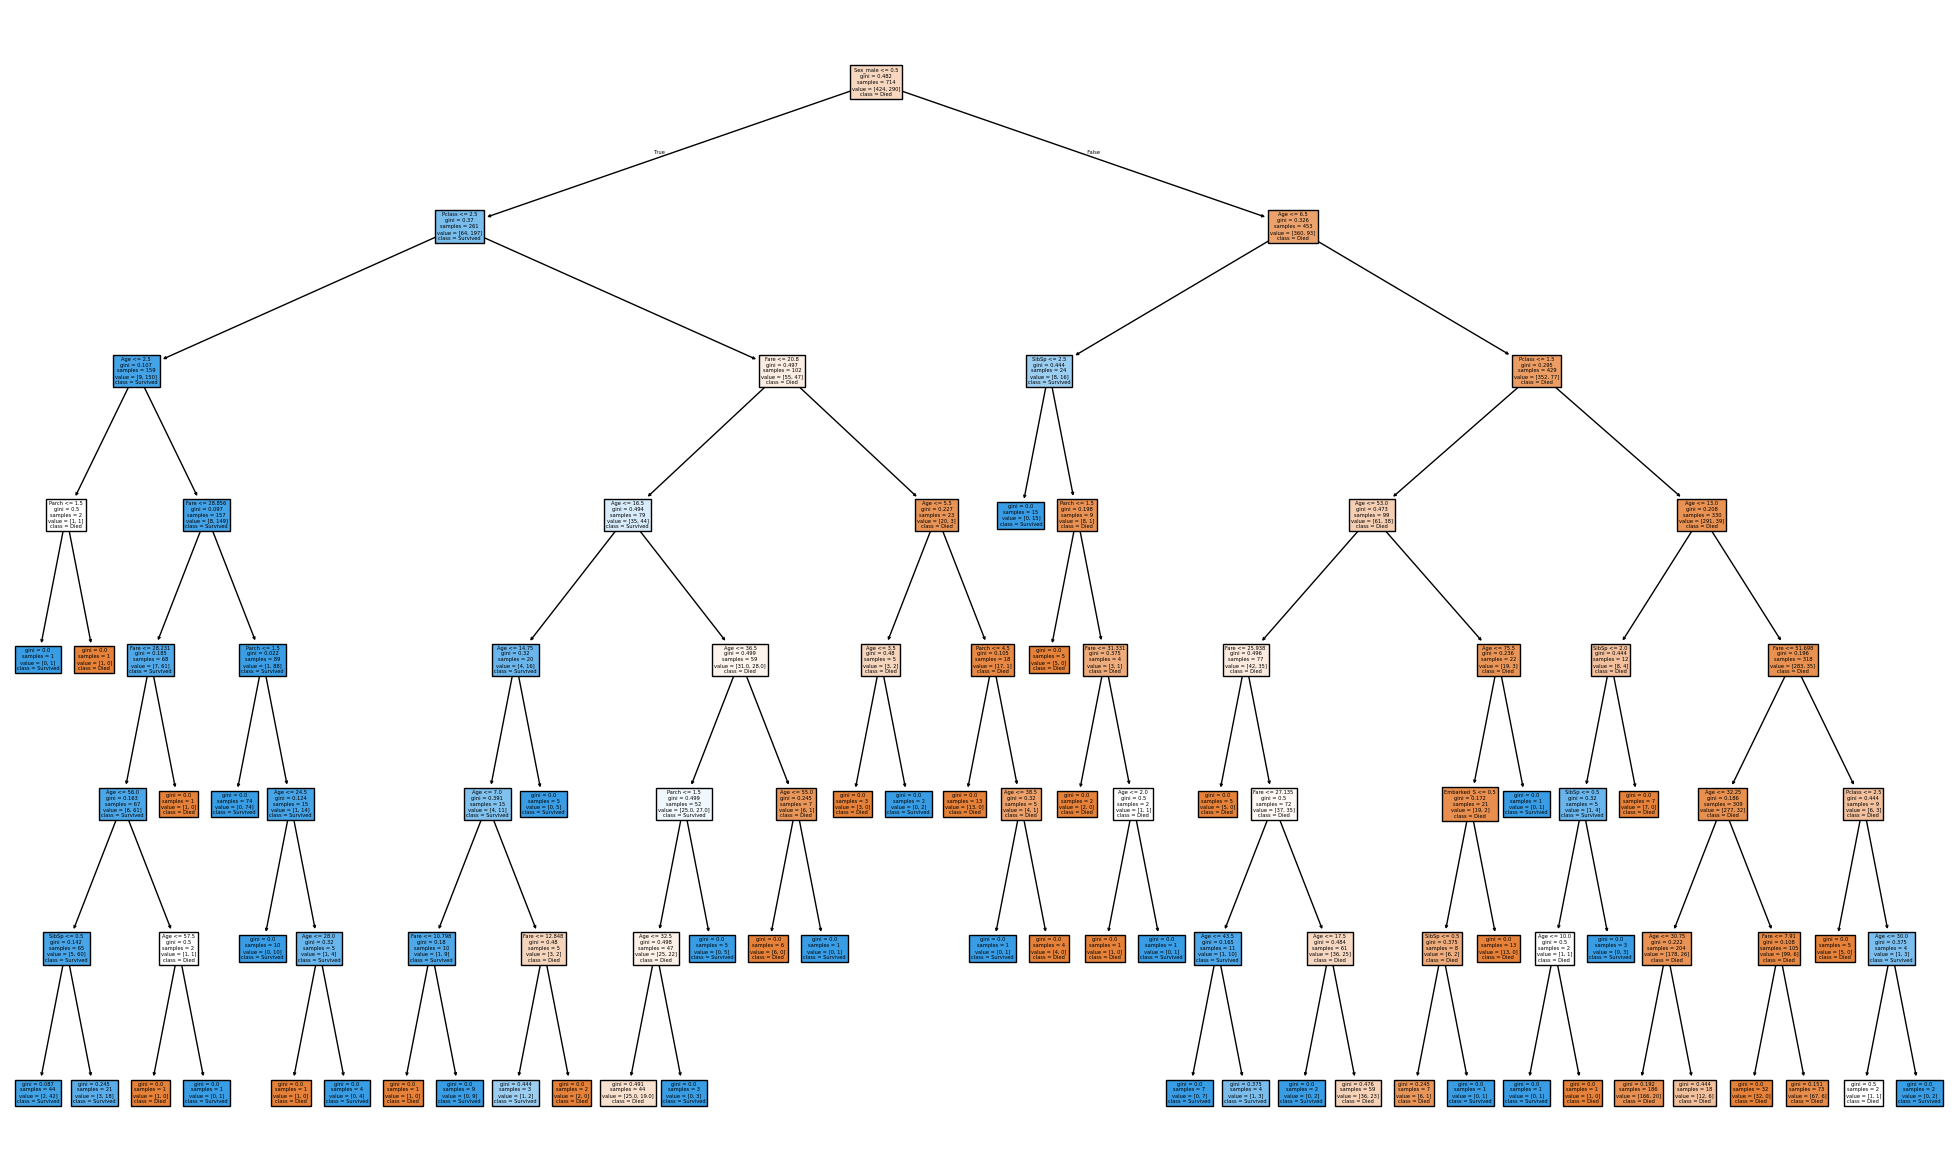

In [295]:
X, y = tit_df.drop(columns=["Survived"]), tit_df["Survived"]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for depth in range(3, 8):
    model = DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Max Depth: {depth} - Accuracy: {cv_scores.mean():.4f}")

clf = model.fit(X, y)
print(f"Korsvalideringsresultat: {cv_scores}")
print(f"Genomsnittlig noggrannhet: {cv_scores.mean():.4f}")
fig = plt.figure(figsize=(25, 15))
_ = tree.plot_tree(
    model,
    feature_names=X.columns,  
    class_names=["Died", "Survived"],
    filled=True
)

plt.show()

/var/folders/c7/mgs83rk93617s2n5004mpjzm0000gn/T/ipykernel_54076/2442138392.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tit_df["Embarked"].fillna(tit_df["Embarked"].mode()[0], inplace=True)


Korsvalideringsresultat: [0.8041958  0.81818182 0.77622378 0.82517483 0.74647887]
Genomsnittlig noggrannhet: 0.7941


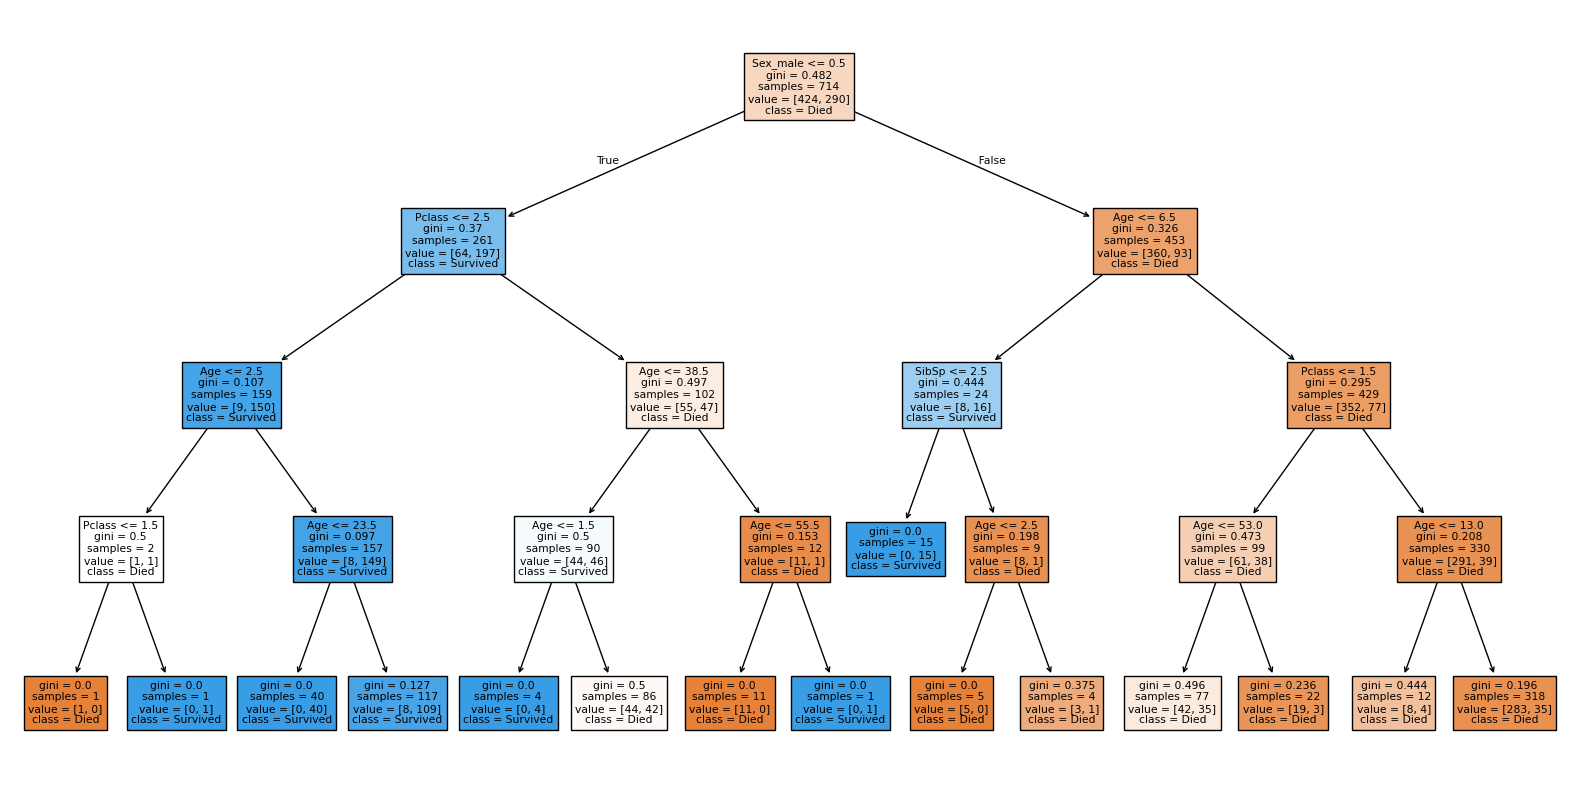

In [303]:

tit_df = titanic_df.drop(["PassengerId", "Cabin", "Name", "Ticket"], axis=1)

tit_df["Embarked"].fillna(tit_df["Embarked"].mode()[0], inplace=True)  
tit_df = tit_df.dropna(subset=["Age"]) 

tit_df = pd.get_dummies(tit_df, columns=["Sex", "Embarked"], dtype=int, drop_first=True)

selected_features = ["Pclass", "Age", "Sex_male", "SibSp", "Parch", "Embarked_Q", "Embarked_S"]
X = tit_df[selected_features]
y = tit_df["Survived"]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeClassifier(max_depth=4)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

clf = model.fit(X, y)

print(f"Korsvalideringsresultat: {cv_scores}")
print(f"Genomsnittlig noggrannhet: {cv_scores.mean():.4f}")


fig = plt.figure(figsize=(20, 10))
_ = tree.plot_tree(
    model,
    feature_names=selected_features,
    class_names=["Died", "Survived"],
    filled=True
)
plt.show()


/var/folders/c7/mgs83rk93617s2n5004mpjzm0000gn/T/ipykernel_54076/3465242845.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic1_df["Age"].fillna(titanic1_df["Age"].median(), inplace=True)
/var/folders/c7/mgs83rk93617s2n5004mpjzm0000gn/T/ipykernel_54076/3465242845.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

Korsvalideringsresultat: [0.83240223 0.8258427  0.80898876 0.80898876 0.84831461]
Genomsnittlig noggrannhet: 0.8249


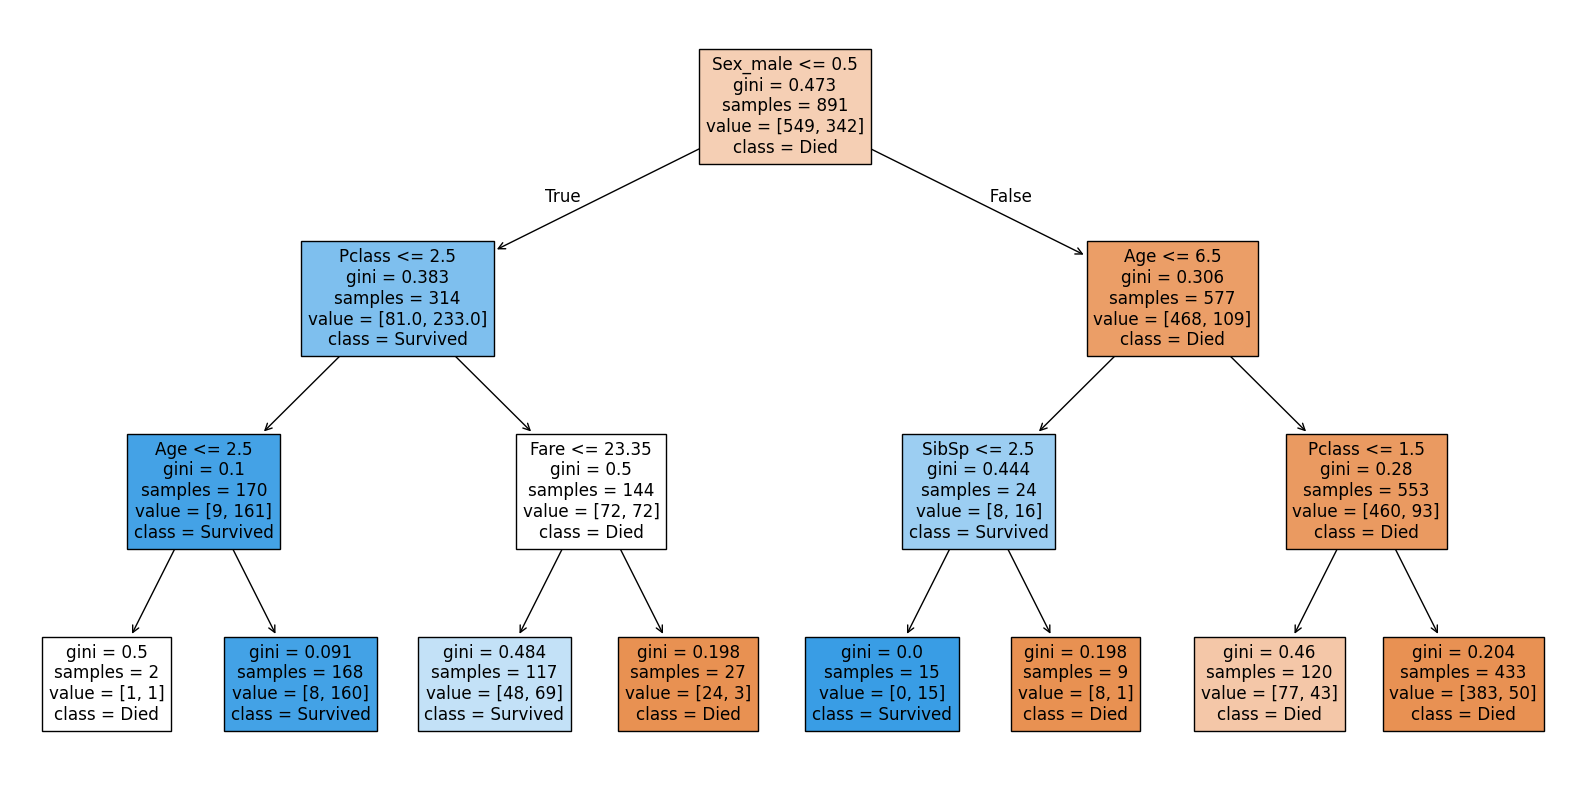

In [308]:

titanic1_df = titanic_df.drop(["PassengerId", "Cabin", "Name", "Ticket"], axis=1)

titanic1_df["Age"].fillna(titanic1_df["Age"].median(), inplace=True)

titanic1_df["Fare"].fillna(titanic1_df["Fare"].median(), inplace=True)

titanic1_df["Embarked"].fillna(titanic1_df["Embarked"].mode()[0], inplace=True)

titanic1_df = pd.get_dummies(titanic1_df, columns=["Sex", "Embarked"], dtype=int, drop_first=True)

selected_features = ["Pclass", "Age", "Fare", "Sex_male", "SibSp", "Parch", "Embarked_Q", "Embarked_S"]
X = titanic1_df[selected_features]
y = titanic1_df["Survived"]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeClassifier(max_depth=3)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

clf = model.fit(X, y)

y_pred = clf.predict(X)


print(f"Korsvalideringsresultat: {cv_scores}")
print(f"Genomsnittlig noggrannhet: {cv_scores.mean():.4f}")


fig = plt.figure(figsize=(20, 10))
_ = tree.plot_tree(
    model,
    feature_names=selected_features,
    class_names=["Died", "Survived"],
    filled=True
)
plt.show()
